In [1]:
#import all libraries
import os
import pandas as pd
import re
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
#get to the directory where our excel file is stored
cur_dir = os.getcwd()
os.chdir('../../')
os.chdir('Labelling')

In [3]:
files = os.listdir()
for file in files:
    if 'xlsx' in file:
        excel_file = file
        break

In [4]:
df = pd.read_excel(excel_file)

#get to our main directory after reading excel files        
os.chdir(cur_dir)

In [5]:
#we just need label and tweets column i.e we remove other unused columns
df = df[['Tweets','Label']]

In [6]:
df.head()

,Tweets,Label
0,yearn taste history from wine glass natural...,D
1,georgia winemakers guardians wine oldest ...,D
2,psst have plans better brighter year c...,P
3,banish whatever from wish leave behind ...,V
4,with winter coming like lion raise many gl...,D


In [7]:
#we get to know count of how many rows each label has
df.groupby('Label').count()

,Tweets
Label,
D,6580
P,9277
R,4667
S,9258
V,3234


In [8]:
Drinking = df[df['Label']=='D']
Politics = df[df['Label']=='P']
Racing = df[df['Label']=='R']
Sports = df[df['Label']=='S']
Violence = df[df['Label']=='V']

In [9]:
Labels = [Drinking,Politics,Racing,Sports,Violence]
Labels_Name = ['Drinking','Politics','Racing','Sports','Violence']
for index,Label in enumerate(Labels):
    df = Label
    
    #apply TFIDF Vectorization and generate keywords files
    vect = TfidfVectorizer(stop_words="english",lowercase=True,max_features= 50)
    tfidf_matrix = vect.fit_transform(df.Tweets.values.astype('U'))
    keywords = {}
    for words in zip(vect.get_feature_names(),vect.idf_):
        keywords[words[1]] = words[0]
    
    #sort that list to get words in ascending order
    keyword = {}
    for key, value in sorted(keywords.items()):
        keyword[value] = key
        
    values = [value for value in keyword.values()]
    normalized =(values-min(values))/(max(values)-min(values))
    #because algorithm mimics most minimum value as zero which will basically dicard our that specific keyword
    normalized[0] = normalized[2]-normalized[1] 
    
    #apply normalized values to keywords
    for value,key in enumerate(keyword.keys()):
        keyword[key] = normalized[value]
    
    #ouptut results to json files
    with open('%s.json'%Labels_Name[index], 'w') as fp:
        json.dump(keyword, fp, indent = 4)

In [18]:
#importing files in dataframe
label = df['Label'].unique()
df.dropna(inplace=True,how='any')

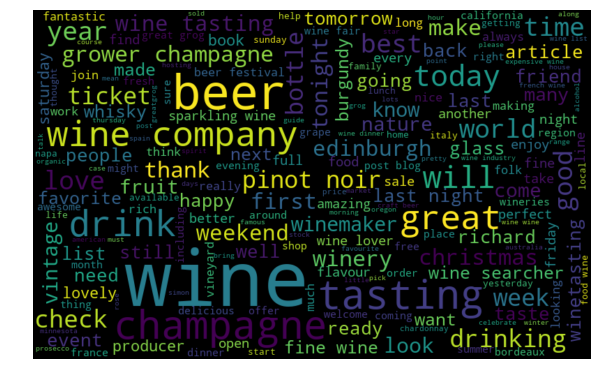

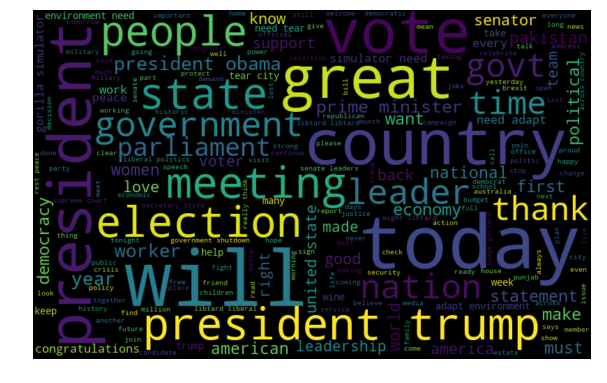

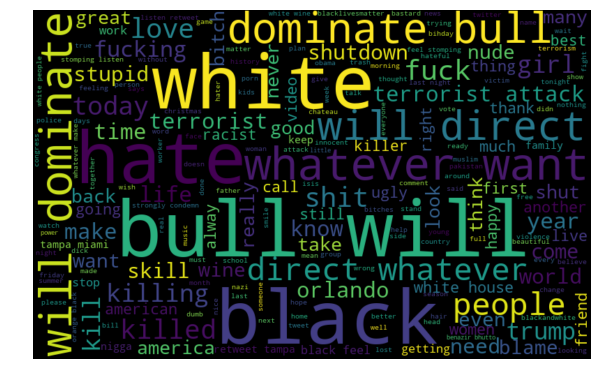

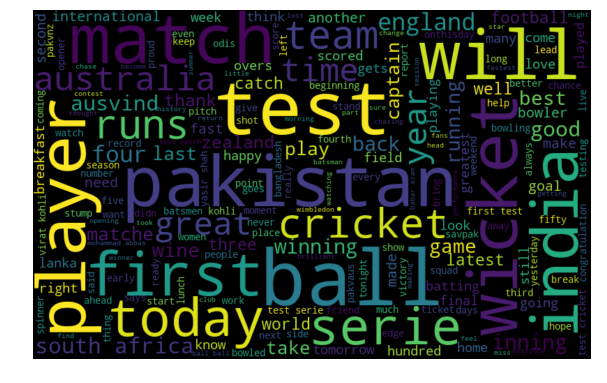

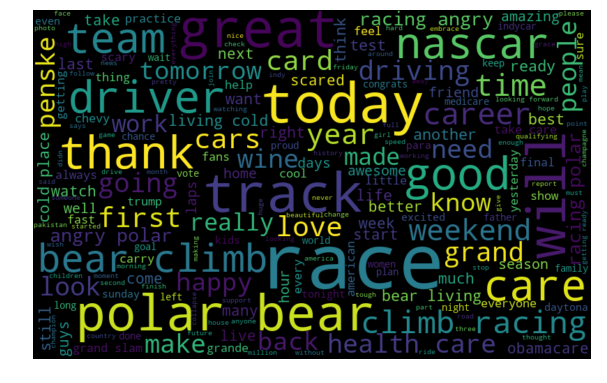

In [33]:
#printing wordcloud using matplotlib
for labels in label:
    all_words = ' '.join([text for text in df.loc[df['Label']==labels]['Tweets']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()